In [ ]:
!wget https://archive.ics.uci.edu/static/public/1/abalone.zip
!unzip abalone.zip
!pip install pycaret

# **ELE8603 - Machine Learning for Engineers, Term Project by Ahmad Fahmy (500913092)**
## **Introduction**
The primary objective of this project is to employ machine learning techniques to classify the sex of abalone, a type of marine mollusk. Our analysis is based on a dataset sourced from the UCI Machine Learning Repository, specifically the Abelone Dataset. This dataset is a compilation of physical measurements of abalone individuals, collected to study the age, which is traditionally determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope - a time consuming task. By leveraging machine learning, we aim to streamline the classification process based on these physical measurements.

Key features included in the dataset are:


1. Sex: Categorical data indicating the sex of the abalone (Male, Female, Infant).
2. Length: Continuous variable representing the longest shell measurement (mm).
3. Diameter: Continuous variable representing the perpendicular measurement to length (mm).
4. Height: Continuous variable for the meat in the shell (mm).
5. Whole Weight: Total weight of the abalone (grams).
6. Shucked Weight: Weight of the abalone meat (grams).
7. Viscera Weight: Gut weight after bleeding (grams).
8. Shell Weight: After being dried, the weight of the shell (grams).
9. Rings: An integer indicating the number of rings on the shell, which can be used to approximate age.

This project will utilize these features to develop a predictive model that classifies abalone into their respective sex categories, employing various machine learning algorithms and tools. By comparing and evaluating different models, we aim to find the most effective approach for this classification task.

##**Loading and Splitting Data**
Below, we will load the dataset from the given URL into a pandas dataframe and split the dataset by a 80/20 split using sklearn's train/test split function. Additionally, the random_state variable is used to ensure the reproducibility of results by providing consistency in data splitting, evaluation, comparison, sharing, collaborating, debugging, and troubleshooting. The training and test data are as follows:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import Markdown

column_names = ["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"]
#url = 'https://archive.ics.uci.edu/static/public/1/data.csv'
abalone_df = pd.read_csv("abalone.data", names=column_names)
abalone_df
#abalone_df = abalone_df[abalone_df['Sex'] != 'Sex']

train_df, test_df = train_test_split(abalone_df, test_size=0.2, random_state=123)
display(Markdown("### Training Data"))
display(train_df.head())
display(Markdown("### Test Data"))
display(test_df.head())


### Training Data

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
2746,I,0.485,0.365,0.140,0.4475,0.1895,0.0925,0.2305,8
853,M,0.570,0.455,0.150,0.9520,0.3895,0.2155,0.2745,9
1809,F,0.640,0.475,0.140,1.0725,0.4895,0.2295,0.3100,8
3419,M,0.590,0.470,0.135,1.1685,0.5390,0.2790,0.2800,8
1199,F,0.720,0.580,0.195,2.1030,1.0265,0.4800,0.5375,10


### Test Data

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
2812,I,0.240,0.170,0.050,0.0545,0.0205,0.0160,0.0155,5
1344,M,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,10
533,F,0.435,0.335,0.110,0.3800,0.1695,0.0860,0.1100,9
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,9
3939,M,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14


##**Model Training with PyCaret**
In this section, we delve into the core of our machine learning task: training models using the powerful and versatile PyCaret library. PyCaret simplifies the model training process with its efficient and user-friendly interface. First, we initialize the PyCaret classification environment by setting up our data within its setup function, which prepares our data for modeling and applies necessary preprocessing steps automatically. Then, using the compare models function which provides a comprehensive comparison of a variety of machine learning models by evaluating each model using cross-validation and ranks them based on the chosen metrics.

In [ ]:
from pycaret.classification import *
clf = setup(data=train_df, target='Sex', session_id=123)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3341, 9)"
6,Transformed train set shape,"(2338, 9)"
7,Transformed test set shape,"(1003, 9)"
8,Numeric features,8
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5522,0.7520,0.5522,0.5454,0.5401,0.3256,0.3304,1.0990
gbc,Gradient Boosting Classifier,0.5500,0.7433,0.5500,0.5458,0.5448,0.3226,0.3243,1.6240
lda,Linear Discriminant Analysis,0.5428,0.7459,0.5428,0.5369,0.5357,0.3120,0.3142,0.0600
ridge,Ridge Classifier,0.5423,0.0000,0.5423,0.5284,0.5263,0.3141,0.3195,0.0730
lightgbm,Light Gradient Boosting Machine,0.5398,0.7283,0.5398,0.5355,0.5369,0.3084,0.3088,0.8170
ada,Ada Boost Classifier,0.5385,0.7176,0.5385,0.5280,0.5283,0.3072,0.3100,0.2080
et,Extra Trees Classifier,0.5364,0.7348,0.5364,0.5286,0.5310,0.3035,0.3043,0.4410
xgboost,Extreme Gradient Boosting,0.5355,0.7240,0.5355,0.5312,0.5320,0.3016,0.3024,0.5160
rf,Random Forest Classifier,0.5269,0.7303,0.5269,0.5203,0.5223,0.2889,0.2896,0.8900
qda,Quadratic Discriminant Analysis,0.5261,0.7332,0.5261,0.5159,0.4955,0.2877,0.3004,0.0470


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

##**Advanced Model Training with PyCaret**
In this slightly more advanced model training, we continue to leverage the capabilities of PyCaret to refine our approach for training and selecting the optimal model. We begin by initializing the PyCaret classification environment with enhanced configuration. This setup includes standardizing features, addressing class imbalance with specific techniques, and implementing automatic feature selection. Furthermore, we apply stratified k-fold cross-validation for a more robust evaluation and remove multicollinear features to improve model reliability. Additionally, we bin certain numeric features, like 'Rings', to explore if these transformations yield better predictive performance.

In [ ]:
clf = setup(data=train_df, target='Sex', fix_imbalance=True)
best_model_fixImb = compare_models()
best_model_fixImbsortF1 = compare_models(sort='F1')
best_model_fixImbsortAUC = compare_models(sort='AUC')
best_model_fixImbsortMCC = compare_models(sort='MCC')

,Description,Value
0,Session id,7743
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3553, 9)"
6,Transformed train set shape,"(2550, 9)"
7,Transformed test set shape,"(1003, 9)"
8,Numeric features,8
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5390,0.7416,0.5390,0.5281,0.5296,0.3104,0.3128,1.7790
lr,Logistic Regression,0.5368,0.7471,0.5368,0.5214,0.5138,0.3110,0.3201,0.2890
et,Extra Trees Classifier,0.5351,0.7314,0.5351,0.5275,0.5291,0.3034,0.3047,0.4660
rf,Random Forest Classifier,0.5342,0.7313,0.5342,0.5274,0.5285,0.3024,0.3039,0.6780
xgboost,Extreme Gradient Boosting,0.5299,0.7201,0.5299,0.5261,0.5269,0.2951,0.2957,0.7960
ridge,Ridge Classifier,0.5253,0.0000,0.5253,0.5219,0.4864,0.2970,0.3161,0.0730
lda,Linear Discriminant Analysis,0.5248,0.7399,0.5248,0.5098,0.5107,0.2907,0.2945,0.0950
lightgbm,Light Gradient Boosting Machine,0.5223,0.7199,0.5223,0.5161,0.5180,0.2834,0.2841,2.1970
nb,Naive Bayes,0.5154,0.7222,0.5154,0.5024,0.4428,0.2864,0.3226,0.0640
qda,Quadratic Discriminant Analysis,0.5154,0.7289,0.5154,0.4974,0.4722,0.2825,0.3010,0.1350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5394,0.7296,0.5394,0.5312,0.5327,0.3102,0.3118,0.8650
lightgbm,Light Gradient Boosting Machine,0.5372,0.7265,0.5372,0.5306,0.5325,0.3062,0.3071,1.1620
et,Extra Trees Classifier,0.5308,0.7305,0.5308,0.5224,0.5244,0.2970,0.2983,0.6370
gbc,Gradient Boosting Classifier,0.5326,0.7405,0.5326,0.5221,0.5233,0.3008,0.3032,1.8050
xgboost,Extreme Gradient Boosting,0.5201,0.7196,0.5201,0.5145,0.5160,0.2801,0.2809,0.3690
lr,Logistic Regression,0.5351,0.7479,0.5351,0.5205,0.5137,0.3082,0.3165,0.2360
lda,Linear Discriminant Analysis,0.5257,0.7421,0.5257,0.5101,0.5104,0.2924,0.2968,0.1280
ada,Ada Boost Classifier,0.5240,0.7202,0.5240,0.5091,0.5036,0.2911,0.2988,0.2830
knn,K Neighbors Classifier,0.5094,0.6923,0.5094,0.5035,0.4998,0.2679,0.2716,0.0810
dt,Decision Tree Classifier,0.4966,0.6202,0.4966,0.4956,0.4954,0.2438,0.2441,0.0740


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5381,0.7475,0.5381,0.5239,0.5160,0.3129,0.3218,0.1660
gbc,Gradient Boosting Classifier,0.5458,0.7418,0.5458,0.5349,0.5364,0.3205,0.3229,1.6890
lda,Linear Discriminant Analysis,0.5287,0.7414,0.5287,0.5140,0.5143,0.2966,0.3007,0.1350
rf,Random Forest Classifier,0.5300,0.7313,0.5300,0.5221,0.5224,0.2970,0.2992,0.5390
et,Extra Trees Classifier,0.5428,0.7310,0.5428,0.5351,0.5370,0.3147,0.3160,0.5350
qda,Quadratic Discriminant Analysis,0.5150,0.7296,0.5150,0.4954,0.4715,0.2818,0.3004,0.0590
lightgbm,Light Gradient Boosting Machine,0.5295,0.7228,0.5295,0.5219,0.5243,0.2946,0.2955,1.2560
nb,Naive Bayes,0.5128,0.7220,0.5128,0.4938,0.4369,0.2829,0.3199,0.0680
ada,Ada Boost Classifier,0.5163,0.7186,0.5163,0.5028,0.4948,0.2787,0.2872,0.2290
xgboost,Extreme Gradient Boosting,0.5231,0.7163,0.5231,0.5177,0.5194,0.2843,0.2849,0.3760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5385,0.7468,0.5385,0.5237,0.5163,0.3135,0.3224,0.2520
nb,Naive Bayes,0.5137,0.7233,0.5137,0.4964,0.4370,0.2842,0.3219,0.1380
ridge,Ridge Classifier,0.5274,0.0000,0.5274,0.5226,0.4892,0.3001,0.3188,0.0740
gbc,Gradient Boosting Classifier,0.5373,0.7431,0.5373,0.5270,0.5277,0.3080,0.3106,1.7840
svm,SVM - Linear Kernel,0.4872,0.0000,0.4872,0.4574,0.3867,0.2363,0.3085,0.1190
lda,Linear Discriminant Analysis,0.5317,0.7410,0.5317,0.5177,0.5164,0.3014,0.3063,0.0570
qda,Quadratic Discriminant Analysis,0.5167,0.7301,0.5167,0.4985,0.4728,0.2844,0.3034,0.1470
lightgbm,Light Gradient Boosting Machine,0.5342,0.7228,0.5342,0.5301,0.5309,0.3010,0.3017,1.0700
rf,Random Forest Classifier,0.5312,0.7269,0.5312,0.5229,0.5247,0.2979,0.2993,0.7100
et,Extra Trees Classifier,0.5312,0.7283,0.5312,0.5230,0.5249,0.2978,0.2991,0.4170


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
clf = setup(data=train_df,
            target='Sex',
            session_id=123,
            normalize=True,
            fix_imbalance=True,
            feature_selection=True,
            fold_strategy='stratifiedkfold',
            remove_multicollinearity=True,
            bin_numeric_features=['Rings'],
           )
best_model_setup = compare_models()
best_model_full_config = compare_models()

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3553, 2)"
6,Transformed train set shape,"(2550, 2)"
7,Transformed test set shape,"(1003, 2)"
8,Numeric features,8
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5039,0.7211,0.5039,0.4822,0.4733,0.2629,0.2740,0.2260
lr,Logistic Regression,0.5013,0.7207,0.5013,0.4815,0.4788,0.2575,0.2645,0.3130
ada,Ada Boost Classifier,0.5009,0.6997,0.5009,0.4946,0.4740,0.2550,0.2690,0.3860
nb,Naive Bayes,0.4970,0.7228,0.4970,0.5260,0.4356,0.2588,0.2884,0.2670
qda,Quadratic Discriminant Analysis,0.4970,0.7228,0.4970,0.5260,0.4356,0.2588,0.2884,0.3220
gbc,Gradient Boosting Classifier,0.4915,0.7117,0.4915,0.4791,0.4747,0.2406,0.2459,1.1630
lightgbm,Light Gradient Boosting Machine,0.4902,0.6971,0.4902,0.4807,0.4805,0.2372,0.2396,0.8100
xgboost,Extreme Gradient Boosting,0.4893,0.6984,0.4893,0.4782,0.4784,0.2359,0.2385,0.6760
ridge,Ridge Classifier,0.4889,0.0000,0.4889,0.3100,0.3787,0.2504,0.2972,0.2240
svm,SVM - Linear Kernel,0.4876,0.0000,0.4876,0.3604,0.4036,0.2381,0.2715,0.3990


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5039,0.7211,0.5039,0.4822,0.4733,0.2629,0.2740,0.2320
lr,Logistic Regression,0.5013,0.7207,0.5013,0.4815,0.4788,0.2575,0.2645,0.2870
ada,Ada Boost Classifier,0.5009,0.6997,0.5009,0.4946,0.4740,0.2550,0.2690,0.4320
nb,Naive Bayes,0.4970,0.7228,0.4970,0.5260,0.4356,0.2588,0.2884,0.2260
qda,Quadratic Discriminant Analysis,0.4970,0.7228,0.4970,0.5260,0.4356,0.2588,0.2884,0.3750
gbc,Gradient Boosting Classifier,0.4915,0.7117,0.4915,0.4791,0.4747,0.2406,0.2459,1.1350
lightgbm,Light Gradient Boosting Machine,0.4902,0.6971,0.4902,0.4807,0.4805,0.2372,0.2396,0.6790
xgboost,Extreme Gradient Boosting,0.4893,0.6984,0.4893,0.4782,0.4784,0.2359,0.2385,0.4790
ridge,Ridge Classifier,0.4889,0.0000,0.4889,0.3100,0.3787,0.2504,0.2972,0.3120
svm,SVM - Linear Kernel,0.4876,0.0000,0.4876,0.3604,0.4036,0.2381,0.2715,0.4950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

##**Hyperperameter Tuning of Selected Models with PyCaret**
In this crucial phase, we focus on the hyperparameter tuning of our selected models, a process vital for enhancing model performance. Utilizing the tune model function, we systematically adjust and optimize the hyperparameters for each of our previously selected models.

In [ ]:
tuned_bm = tune_model(best_model)
tuned_fi = tune_model(best_model_fixImb)
tuned_fisf1 = tune_model(best_model_fixImbsortF1)
tuned_fiauc = tune_model(best_model_fixImbsortAUC)
tuned_fimcc = tune_model(best_model_fixImbsortMCC)
tuned_setup = tune_model(best_model_setup)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4872,0.7098,0.4872,0.4636,0.4643,0.2363,0.2423
1,0.5128,0.7195,0.5128,0.4944,0.4916,0.2741,0.2811
2,0.5427,0.7227,0.5427,0.5421,0.5244,0.3200,0.3303
3,0.4744,0.7150,0.4744,0.4569,0.4596,0.2153,0.2182
4,0.4615,0.7169,0.4615,0.4333,0.4354,0.1990,0.2046
5,0.5043,0.7110,0.5043,0.4807,0.4792,0.2619,0.2695
6,0.4872,0.7295,0.4872,0.4535,0.4556,0.2376,0.2457
7,0.4957,0.7337,0.4957,0.4765,0.4784,0.2483,0.2527
8,0.5150,0.7320,0.5150,0.4944,0.4853,0.2795,0.2908


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5171,0.7056,0.5171,0.5045,0.5039,0.2780,0.2818
1,0.5256,0.7078,0.5256,0.5122,0.5111,0.2914,0.2959
2,0.4744,0.7026,0.4744,0.4643,0.4657,0.2125,0.2141
3,0.5256,0.7255,0.5256,0.5287,0.5227,0.2910,0.2935
4,0.4829,0.6695,0.4829,0.4671,0.4681,0.2276,0.2309
5,0.4786,0.6829,0.4786,0.4634,0.4626,0.2217,0.2257
6,0.5171,0.7151,0.5171,0.5110,0.5110,0.2772,0.2788
7,0.4957,0.7158,0.4957,0.4976,0.4947,0.2452,0.2462
8,0.5708,0.7282,0.5708,0.5656,0.5561,0.3606,0.3683


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5128,0.7115,0.5128,0.5151,0.4837,0.2780,0.2926
1,0.5128,0.7211,0.5128,0.5099,0.4982,0.2734,0.2809
2,0.5214,0.7213,0.5214,0.5115,0.4897,0.2847,0.3012
3,0.5299,0.7160,0.5299,0.5269,0.5155,0.2996,0.3069
4,0.4444,0.6662,0.4444,0.4048,0.4001,0.1756,0.1864
5,0.4615,0.6838,0.4615,0.4544,0.4524,0.1965,0.1991
6,0.5427,0.7408,0.5427,0.5333,0.5355,0.3131,0.3145
7,0.5128,0.7299,0.5128,0.5035,0.5055,0.2666,0.2680
8,0.5408,0.7148,0.5408,0.5393,0.5299,0.3109,0.3166


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4872,0.7098,0.4872,0.4636,0.4643,0.2363,0.2423
1,0.5128,0.7195,0.5128,0.4944,0.4916,0.2741,0.2811
2,0.5427,0.7227,0.5427,0.5421,0.5244,0.3200,0.3303
3,0.4744,0.7150,0.4744,0.4569,0.4596,0.2153,0.2182
4,0.4615,0.7169,0.4615,0.4333,0.4354,0.1990,0.2046
5,0.5043,0.7110,0.5043,0.4807,0.4792,0.2619,0.2695
6,0.4872,0.7295,0.4872,0.4535,0.4556,0.2376,0.2457
7,0.4957,0.7337,0.4957,0.4765,0.4784,0.2483,0.2527
8,0.5150,0.7320,0.5150,0.4944,0.4853,0.2795,0.2908


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4872,0.7098,0.4872,0.4636,0.4643,0.2363,0.2423
1,0.5128,0.7195,0.5128,0.4944,0.4916,0.2741,0.2811
2,0.5427,0.7227,0.5427,0.5421,0.5244,0.3200,0.3303
3,0.4744,0.7150,0.4744,0.4569,0.4596,0.2153,0.2182
4,0.4615,0.7169,0.4615,0.4333,0.4354,0.1990,0.2046
5,0.5043,0.7110,0.5043,0.4807,0.4792,0.2619,0.2695
6,0.4872,0.7295,0.4872,0.4535,0.4556,0.2376,0.2457
7,0.4957,0.7337,0.4957,0.4765,0.4784,0.2483,0.2527
8,0.5150,0.7320,0.5150,0.4944,0.4853,0.2795,0.2908


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4957,0.7114,0.4957,0.4706,0.4676,0.2502,0.2589
1,0.5000,0.7192,0.5000,0.4769,0.4691,0.2570,0.2683
2,0.5427,0.7241,0.5427,0.5479,0.5152,0.3218,0.3388
3,0.4872,0.7154,0.4872,0.4677,0.4666,0.2361,0.2417
4,0.4744,0.7167,0.4744,0.4409,0.4380,0.2199,0.2298
5,0.4915,0.7106,0.4915,0.4610,0.4546,0.2448,0.2574
6,0.4872,0.7306,0.4872,0.4546,0.4462,0.2395,0.2525
7,0.5085,0.7332,0.5085,0.4902,0.4868,0.2687,0.2756
8,0.5193,0.7317,0.5193,0.4949,0.4794,0.2873,0.3041


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


##**Visualizing Model Performance with Confusion Matrices**
Next, we employ confusion matrices to visually assess the performance of our selected models. Confusion matrices are powerful tools for understanding a model's predictive capabilities, particularly in distinguishing between different classes.

,Description,Value
0,Session id,1644
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3341, 9)"
6,Transformed train set shape,"(2338, 9)"
7,Transformed test set shape,"(1003, 9)"
8,Numeric features,8
9,Preprocess,True


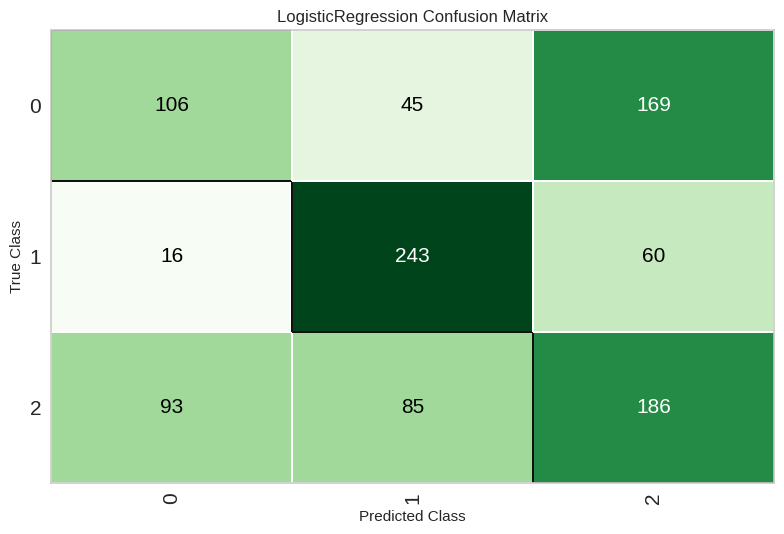

,Description,Value
0,Session id,2179
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3553, 9)"
6,Transformed train set shape,"(2550, 9)"
7,Transformed test set shape,"(1003, 9)"
8,Numeric features,8
9,Preprocess,True


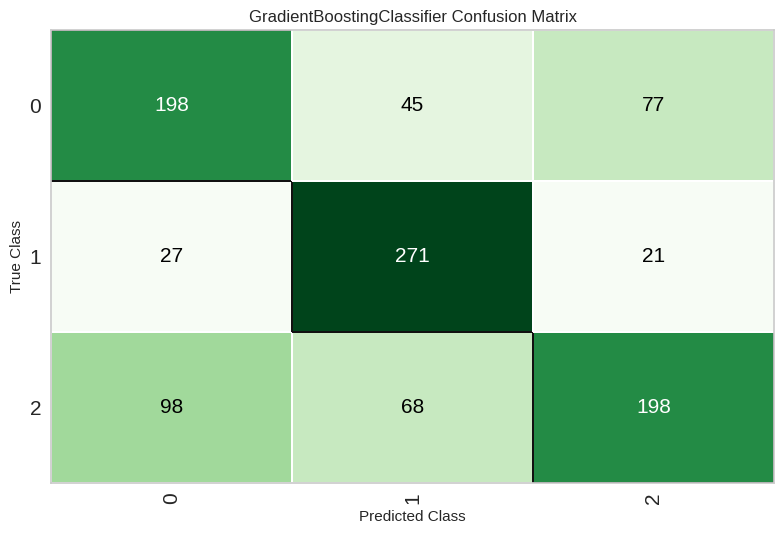

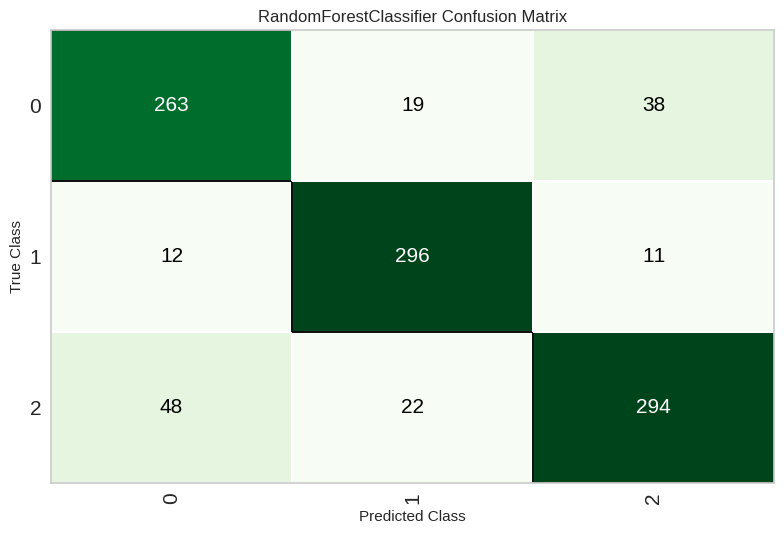

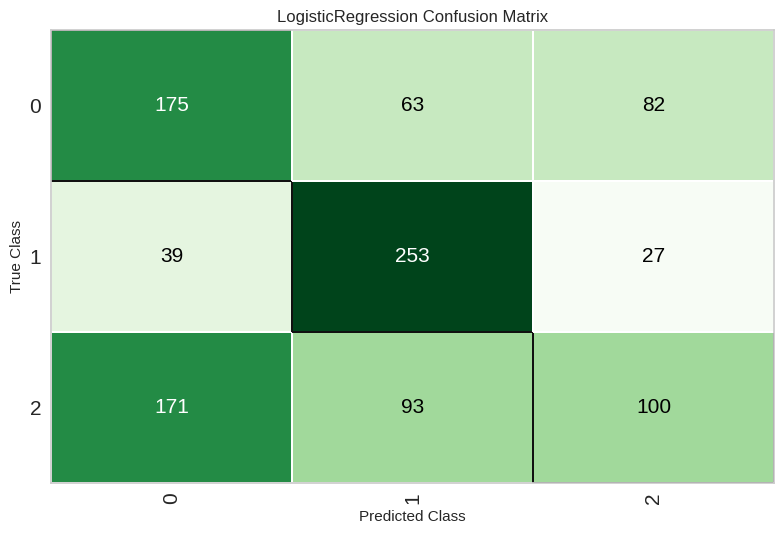

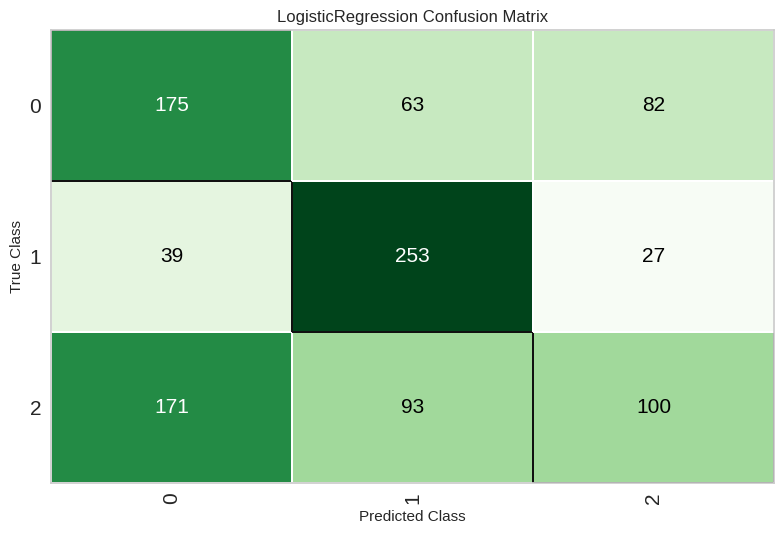

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3553, 2)"
6,Transformed train set shape,"(2550, 2)"
7,Transformed test set shape,"(1003, 2)"
8,Numeric features,8
9,Preprocess,True


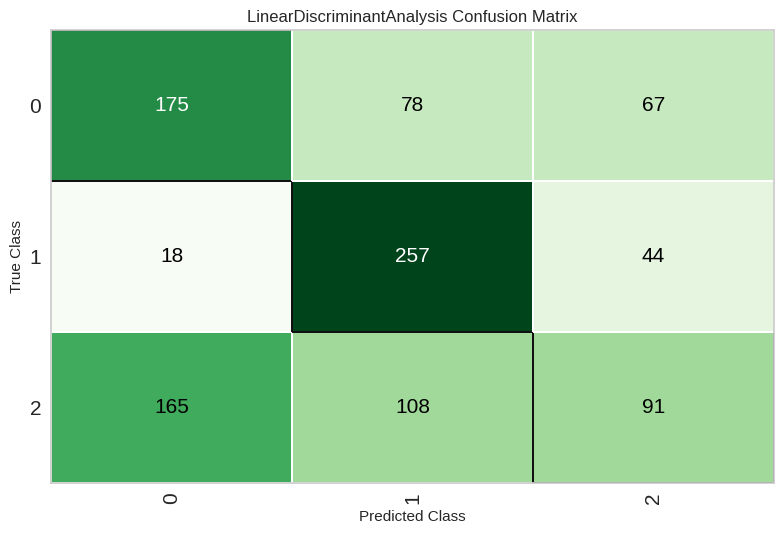

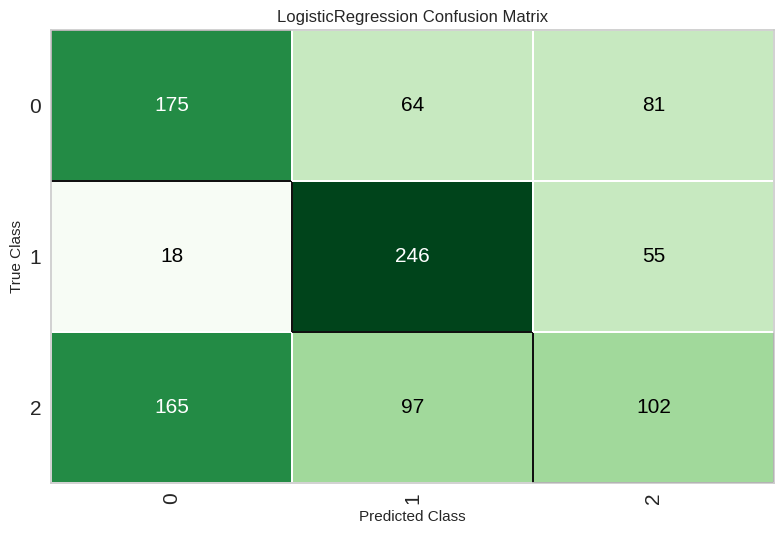

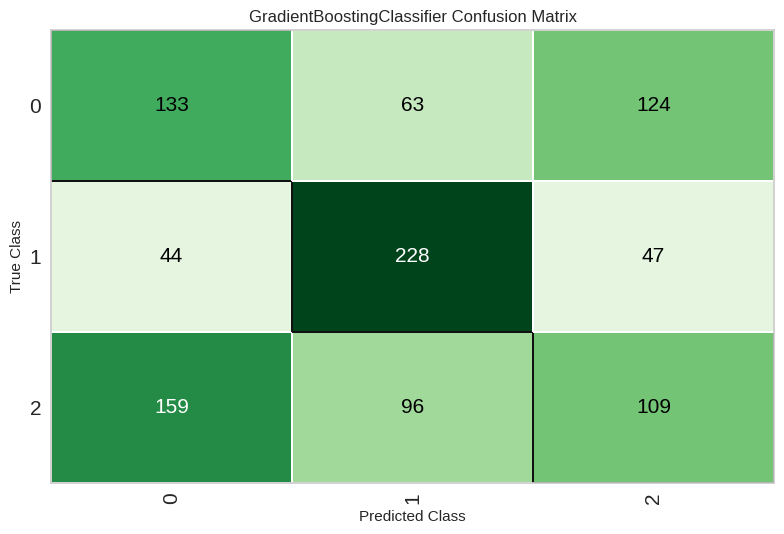

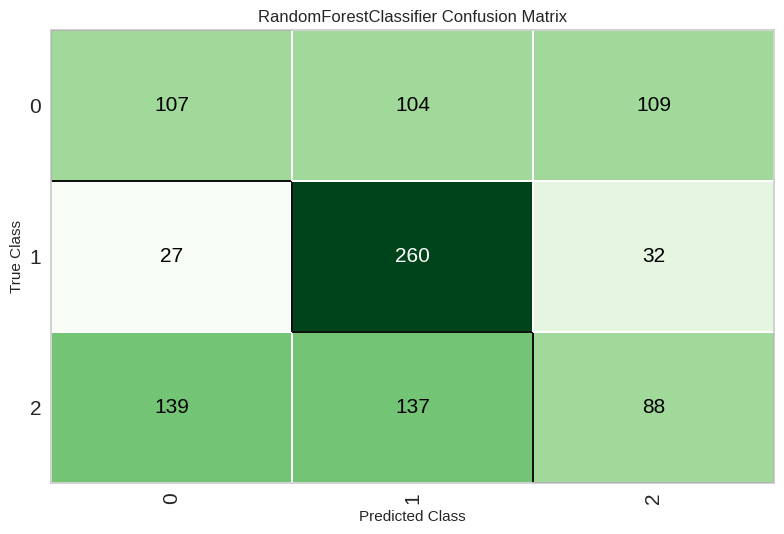

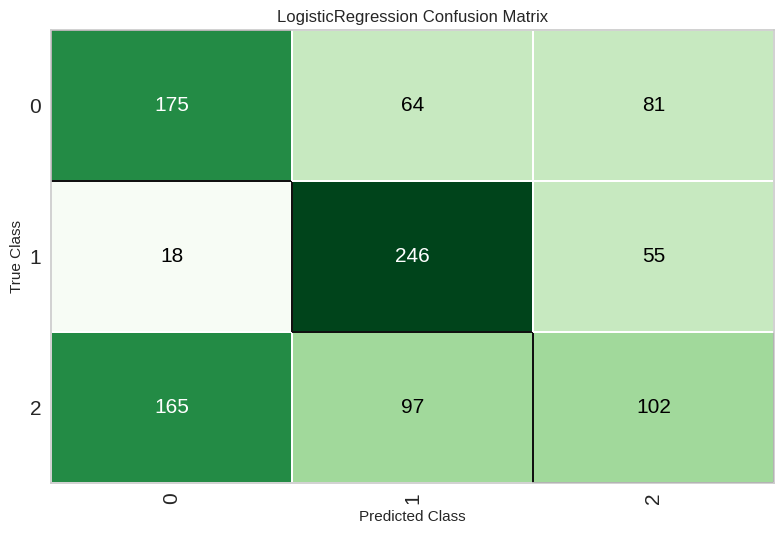

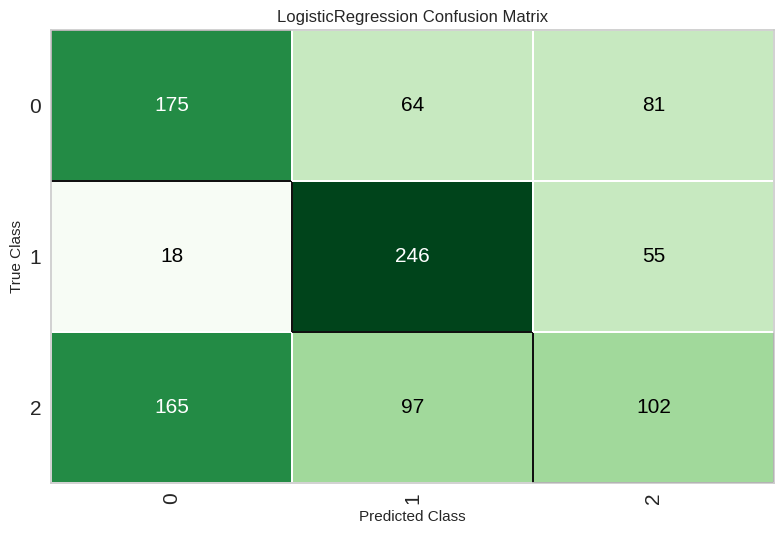

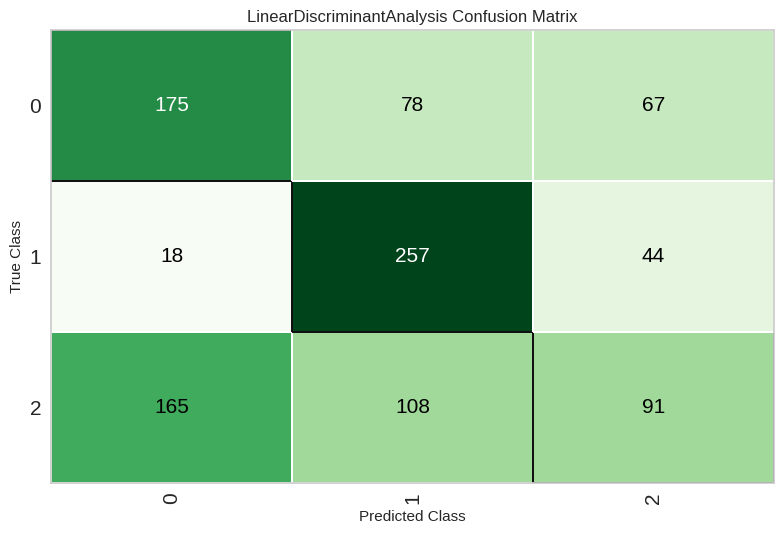

In [ ]:
clf = setup(data=train_df, target='Sex')
plot_model(best_model, plot = 'confusion_matrix')
clf = setup(data=train_df, target='Sex', fix_imbalance=True)
plot_model(best_model_fixImb, plot = 'confusion_matrix')
plot_model(best_model_fixImbsortF1, plot = 'confusion_matrix')
plot_model(best_model_fixImbsortAUC, plot = 'confusion_matrix')
plot_model(best_model_fixImbsortMCC, plot = 'confusion_matrix')
clf = setup(data=train_df,
            target='Sex',
            session_id=123,
            normalize=True,
            fix_imbalance=True,
            feature_selection=True,
            fold_strategy='stratifiedkfold',
            remove_multicollinearity=True,
            bin_numeric_features=['Rings'],
           )
plot_model(best_model_setup, plot = 'confusion_matrix')

plot_model(tuned_bm, plot = 'confusion_matrix')
plot_model(tuned_fi, plot = 'confusion_matrix')
plot_model(tuned_fisf1, plot = 'confusion_matrix')
plot_model(tuned_fiauc, plot = 'confusion_matrix')
plot_model(tuned_fimcc, plot = 'confusion_matrix')
plot_model(tuned_setup, plot = 'confusion_matrix')

##**Analysis of Confusion Matrices**

Logistic Regression (best_model)

* Class 0: 106 correct predictions, 45 misclassified as class 1, 169 misclassified as class 2.
* Class 1: 243 correct predictions, 16 misclassified as class 0, 60 misclassified as class 2.
* Class 2: 186 correct predictions, 93 misclassified as class 0, 85 misclassified as class 1.
* The model struggles with class 0, confusing it with class 2 often.

Gradient Boosting (best_model_fixImb)

* Class 0: 198 correct predictions, 45 misclassified as class 1, 77 misclassified as class 2.
*Class 1: 271 correct predictions, 27 misclassified as class 0, 21 misclassified as class 2.
*Class 2: 198 correct predictions, 98 misclassified as class 0, 68 misclassified as class 1.
*This model shows balanced performance across all classes.

Random Forest Classifier (best_model_fixImbsortF1)

* Class 0: 263 correct predictions, very few misclassified into other classes.
*Class 1: 296 correct predictions, very few misclassified into other classes.
*Class 2: 294 correct predictions, some misclassification with class 0 and 1.
*This model has shown the best performance with the highest correct predictions and fewer misclassifications.

Logistic Regression (best_model_fixImbsortAUC)

* Class 0: 175 correct predictions, similar misclassification rates for class 1 and 2.
*Class 1: 253 correct predictions, lower misclassification rates compared to others.
*Class 2: 100 correct predictions, significant misclassification with class 0.
*This model performs well for class 1 but struggles with class 2.

Logistic Regression (best_model_fixImbsortMCC)

* Class 0: 175 correct predictions, similar misclassification rates for class 1 and 2.
*Class 1: 253 correct predictions, lower misclassification rates compared to others.
*Class 2: 100 correct predictions, significant misclassification with class 0.
*Identical to the previous model, indicating potential duplication or error.

Linear Discriminant Analysis (best_model_setup)

* Class 0: 175 correct predictions, with some confusion between class 1 and 2.
*Class 1: 257 correct predictions, minimal misclassification.
*Class 2: 91 correct predictions, significant misclassification with class 0.
*Strong performance for class 1 but struggles to distinguish class 2 from class 0.

Logistic Regression (tuned_bm)

* Class 0: 175 correct predictions, some confusion between class 1 and 2.
*Class 1: 246 correct predictions, lower misclassification rates compared to others.
*Class 2: 102 correct predictions, significant misclassification with class 0.
*Similar to earlier Logistic Regression models, class 1 is predicted well, but class 0 and 2 are often confused.

Gradient Boosting Classifier (tuned_fi)

* Class 0: 133 correct predictions, high misclassification with class 2.
*Class 1: 228 correct predictions, relatively few misclassifications.
*Class 2: 109 correct predictions, significant misclassification with class 0 and 1.
*This model has difficulty correctly classifying class 2.

Random Forest Classifier (tuned_fisf1)

* Class 0: 107 correct predictions, high misclassification with other classes.
*Class 1: 260 correct predictions, relatively few misclassifications.
*Class 2: 88 correct predictions, significant misclassification with class 0 and 1.
*Class 1 is well predicted, but the model struggles with class 0 and 2.

Logistic Regression (tuned_fiauc)

* Class 0: 175 correct predictions, similar misclassification rates for class 1 and 2.
*Class 1: 246 correct predictions, lower misclassification rates compared to others.
*Class 2: 102 correct predictions, significant misclassification with class 0.
*Similar to earlier Logistic Regression models, class 1 is predicted well, but class 0 and 2 are often confused.

Logistic Regression (tuned_fimcc)

* Class 0: 175 correct predictions, similar misclassification rates for class 1 and 2.
*Class 1: 246 correct predictions, lower misclassification rates compared to others.
*Class 2: 102 correct predictions, significant misclassification with class 0.
*Identical to the Logistic Regression (tuned_fiauc), indicating potential duplication or error.

Linear Discriminant Analysis (tuned_setup)

* Class 0: 175 correct predictions, with some confusion between class 1 and 2.
*Class 1: 257 correct predictions, minimal misclassification.
*Class 2: 91 correct predictions, significant misclassification with class 0.
*Strong performance for class 1 but struggles to distinguish class 2 from class 0.

Therefore, the Random Forest Classifier (best_model_fixImbsortF1) stands out with the highest number of correct predictions across all classes and the lowest misclassification rates, indicating it is likely the best model among those created. The Gradient Boosting models also show good performance but not as consistent as the Random Forest. Logistic Regression models tend to confuse class 0 and class 2, whereas Linear Discriminant Analysis models show strength in predicting class 1 but have a notable weakness with class 2.

##**Model Predictions on Test Data**
In this final and critical step, we apply our trained and tuned models to the test dataset to evaluate their predictive performance. We begin with the basic setup, testing the intitial best model. Subsequently, we test models adjusted for class imbalance, those fine-tuned for specific metrics (F1, AUC, and MCC), and the model selected from our advanced setup. Finally, we apply our tuned models to the test data. This comprehensive approach allows us to assess each model's effectiveness in predicting the sex of abalone on unseen data, providing a realistic gauge of their real world appilcability and performance.

In [ ]:
clf = setup(data=train_df, target='Sex', session_id=123)
predictions = predict_model(best_model, data=test_df)

clf = setup(data=train_df, target='Sex', fix_imbalance=True)
predictions = predict_model(best_model_fixImb, data=test_df)
predictions = predict_model(best_model_fixImbsortF1, data=test_df)
predictions = predict_model(best_model_fixImbsortAUC, data=test_df)
predictions = predict_model(best_model_fixImbsortMCC, data=test_df)

clf = setup(data=train_df,
            target='Sex',
            session_id=123,
            normalize=True,
            fix_imbalance=True,
            feature_selection=True,
            fold_strategy='stratifiedkfold',
            remove_multicollinearity=True,
            bin_numeric_features=['Rings'],
           )
predictions = predict_model(best_model_setup, data=test_df)

predictions = predict_model(tuned_bm, data=test_df)
predictions = predict_model(tuned_fi, data=test_df)
predictions = predict_model(tuned_fisf1, data=test_df)
predictions = predict_model(tuned_fiauc, data=test_df)
predictions = predict_model(tuned_fimcc, data=test_df)
predictions = predict_model(tuned_setup, data=test_df)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3341, 9)"
6,Transformed train set shape,"(2338, 9)"
7,Transformed test set shape,"(1003, 9)"
8,Numeric features,8
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5634,0.7608,0.5634,0.5491,0.5509,0.3357,0.3389


,Description,Value
0,Session id,700
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3553, 9)"
6,Transformed train set shape,"(2550, 9)"
7,Transformed test set shape,"(1003, 9)"
8,Numeric features,8
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5598,0.7685,0.5598,0.5583,0.5530,0.3430,0.3471


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5754,0.7632,0.5754,0.5731,0.5716,0.3639,0.3657


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5467,0.7593,0.5467,0.5369,0.5287,0.3256,0.3337


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5467,0.7593,0.5467,0.5369,0.5287,0.3256,0.3337


,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3553, 2)"
6,Transformed train set shape,"(2550, 2)"
7,Transformed test set shape,"(1003, 2)"
8,Numeric features,8
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.5084,0.7333,0.5084,0.4907,0.4763,0.2701,0.2826


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5012,0.7334,0.5012,0.4823,0.4766,0.2581,0.2663


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.4821,0.6851,0.4821,0.4702,0.4699,0.2235,0.2264


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4988,0.7083,0.4988,0.4867,0.4723,0.2499,0.2610


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5012,0.7334,0.5012,0.4823,0.4766,0.2581,0.2663


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5012,0.7334,0.5012,0.4823,0.4766,0.2581,0.2663


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.5084,0.7333,0.5084,0.4907,0.4763,0.2701,0.2826


##**Analysis of Prediction Metrics**
1. Random Forest Classifier shows the most robust performance with the highest accuracy (0.5754), AUC (0.7632), and F1 score (0.5716), indicating a strong balance between precision and recall. Its high Kappa and MCC scores suggest a consistent ability to predict across classes beyond what is expected by chance.

2. Gradient Boosting Classifier follows closely, with slightly lower performance metrics but still maintaining a strong AUC (0.7685), which measures its ability to differentiate between classes at various threshold settings.

3. Linear Discriminant Analysis exhibits moderate performance, with balanced accuracy and AUC around 0.73, but lower F1, Kappa, and MCC scores indicate some limitations in model agreement and correlation with true outcomes.

4. Logistic Regression variants display varied performance, with the best showing an accuracy of 0.5634 and the lowest around 0.5012. AUC remains fairly consistent across these variants, suggesting a decent ability to rank positive cases higher than negative ones, but actual classification accuracy varies.


Based on the prediction performance metrics on the unseen test dataset we can conclude the Random Forest model's strength is in its overall balance across metrics, making it potentially the most reliable choice for deployment in this scenario. Gradient Boosting and Linear Discriminant Analysis may be alternatives depending on the emphasis on either AUC or other performance metrics, respectively. The performance of Logistic Regression models suggests that while they are competitive, they may not be as robust as ensemble methods like Random Forest or Gradient Boosting in this context.

##**Conclusion: Selecting and Saving the Best Model**
In this final section, we conclude our machine learning endeavor to predict the sex of abalones using various models in PyCaret. After thorough experimentation with multiple algorithms and configurations, we've determined the Random Forest Classifier as our champion model. It stands out with the highest accuracy, AUC, and F1 score, indicating a superior balance between precision and recall while maintaining robust agreement across folds.

Now, it's time to finalize our model. We'll save the Random Forest Classifier, which not only performed best according to our metrics but also proved to be the most consistent across different measures of performance. This model is expected to generalize well to new, unseen data, preserving the integrity of its predictive power.

Here's a short snippet of code that encapsulates the final steps of our journey — selecting and saving the best model:

In [ ]:
final_best_model = finalize_model(best_model_fixImbsortF1)
save_model(final_best_model, 'final_rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole Weight', 'Shucked Weight',
                                              'Viscera Weight', 'Shell Weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicator=Fa...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=N